In [31]:
# keras sequential model
from keras.models import Sequential

In [32]:
# creating the model
model = Sequential()

In [33]:
# adding layers
from keras.layers import Dense

model.add(Dense(units=32,activation='relu',input_dim=30))   #layer1
model.add(Dense(units=16,activation='relu'))   #layer2
model.add(Dense(units=1,activation='sigmoid'))   #output layer, binary classification problem. 

In [34]:
# compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=44)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
history = model.fit(x_train,y_train,epochs=20,batch_size=50,validation_data=(x_test,y_test))
# we are getting loss and accuracy on training data
# and also on the validation data for each epoch

Train on 455 samples, validate on 114 samples
Epoch 1/20
455/455 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.5978 - val_loss: 0.4886 - val_accuracy: 0.8421
Epoch 2/20
455/455 [==============================] - 0s 61us/step - loss: 0.4667 - accuracy: 0.8330 - val_loss: 0.3500 - val_accuracy: 0.9474
Epoch 3/20
455/455 [==============================] - 0s 58us/step - loss: 0.3617 - accuracy: 0.8945 - val_loss: 0.2644 - val_accuracy: 0.9561
Epoch 4/20
455/455 [==============================] - 0s 56us/step - loss: 0.2969 - accuracy: 0.9121 - val_loss: 0.2096 - val_accuracy: 0.9737
Epoch 5/20
455/455 [==============================] - 0s 70us/step - loss: 0.2529 - accuracy: 0.9231 - val_loss: 0.1747 - val_accuracy: 0.9737
Epoch 6/20
455/455 [==============================] - 0s 63us/step - loss: 0.2212 - accuracy: 0.9297 - val_loss: 0.1478 - val_accuracy: 0.9737
Epoch 7/20
455/455 [==============================] - 0s 57us/step - loss: 0.1975 - accuracy: 0.9

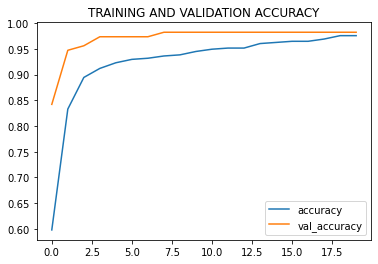

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()
plt.title('TRAINING AND VALIDATION ACCURACY')
plt.savefig('fig1.jpg')

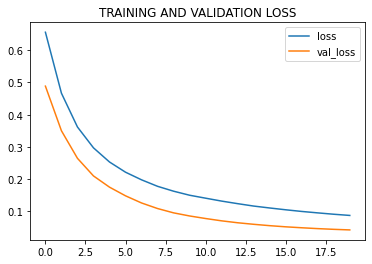

In [43]:
history_df[['loss', 'val_loss']].plot()
plt.title('TRAINING AND VALIDATION LOSS')
plt.savefig('fig2.jpg')

In [44]:
predictions = model.predict(x_test)
predictions

array([[7.1671844e-02],
       [2.0366907e-04],
       [9.9075174e-01],
       [1.7398596e-04],
       [7.8794533e-01],
       [9.8197931e-01],
       [9.9925208e-01],
       [8.3477557e-01],
       [3.9177835e-03],
       [9.9957865e-01],
       [2.1578124e-01],
       [9.8297095e-01],
       [1.0872483e-03],
       [3.0434340e-02],
       [9.9958247e-01],
       [9.5961440e-01],
       [9.9968314e-01],
       [2.6493967e-03],
       [6.5316767e-02],
       [9.7869897e-01],
       [9.9949419e-01],
       [9.5188630e-01],
       [9.9998796e-01],
       [9.8046899e-01],
       [9.8451555e-01],
       [3.1351787e-01],
       [9.7781384e-01],
       [9.5195794e-01],
       [7.8637600e-03],
       [9.9994004e-01],
       [9.9772131e-01],
       [9.9711943e-01],
       [9.9151731e-01],
       [9.9734020e-01],
       [9.9176431e-01],
       [9.9752313e-01],
       [9.9996221e-01],
       [9.9779022e-01],
       [9.9965340e-01],
       [9.5165998e-01],
       [9.3122911e-01],
       [9.912976

In [45]:
score=model.evaluate(x_test,y_test)
score
# this is the loss and accuracy, the metric which we provided above when writing the compile function. 

114/114 [==============================] - 0s 46us/step


[0.041780412131757066, 0.9824561476707458]